### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
# Cálculo de facturación total por tienda

ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

print("Facturación total por tienda:")
print(f"Tienda 1: ${ingreso_tienda1:,.0f}")
print(f"Tienda 2: ${ingreso_tienda2:,.0f}")
print(f"Tienda 3: ${ingreso_tienda3:,.0f}")
print(f"Tienda 4: ${ingreso_tienda4:,.0f}")

Facturación total por tienda:
Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


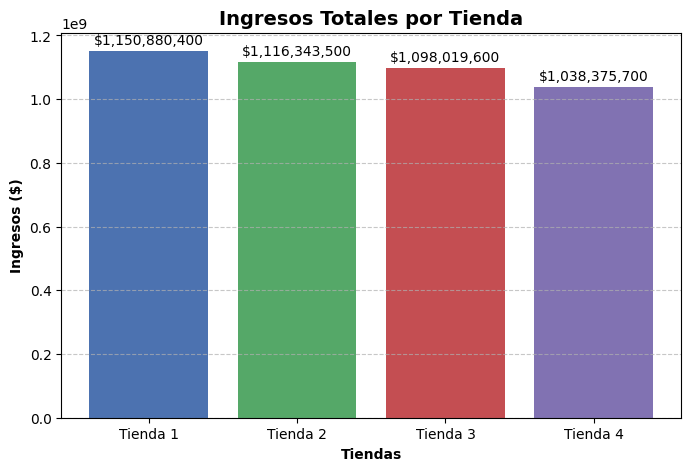

In [5]:
#Importación de la librería matplotlib y generación de un gráfico de barras con el total de ingresos

import matplotlib.pyplot as plt

ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure(figsize=(8, 5))
barras = plt.bar(nombres_tiendas, ingresos, color=["#4C72B0", "#55A868", "#C44E52", "#8172B2"])

for barra, ingreso in zip(barras, ingresos):
    plt.text(barra.get_x() + barra.get_width()/2,
             barra.get_height() + barra.get_height()*0.01,
             f"${ingreso:,.0f}",
             ha='center', va='bottom', fontsize=10)

plt.title("Ingresos Totales por Tienda", fontsize=14, fontweight='bold')
plt.xlabel("Tiendas", fontweight='bold')
plt.ylabel("Ingresos ($)", fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# 2. Ventas por categoría

In [ ]:
# Categorías más populares
def categorias_populares(df, nombre_tienda, top_n=5):
    print(f"\nCategorías más populares en {nombre_tienda}:")
    categorias = df['Categoría del Producto'].value_counts().head(top_n)
    print(categorias)
    return categorias

cat_t1 = categorias_populares(tienda, "Tienda 1")
cat_t2 = categorias_populares(tienda2, "Tienda 2")
cat_t3 = categorias_populares(tienda3, "Tienda 3")
cat_t4 = categorias_populares(tienda4, "Tienda 4")



Categorías más populares en Tienda 1:
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: count, dtype: int64

Categorías más populares en Tienda 2:
Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: count, dtype: int64

Categorías más populares en Tienda 3:
Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: count, dtype: int64

Categorías más populares en Tienda 4:
Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: count, dtype: int64


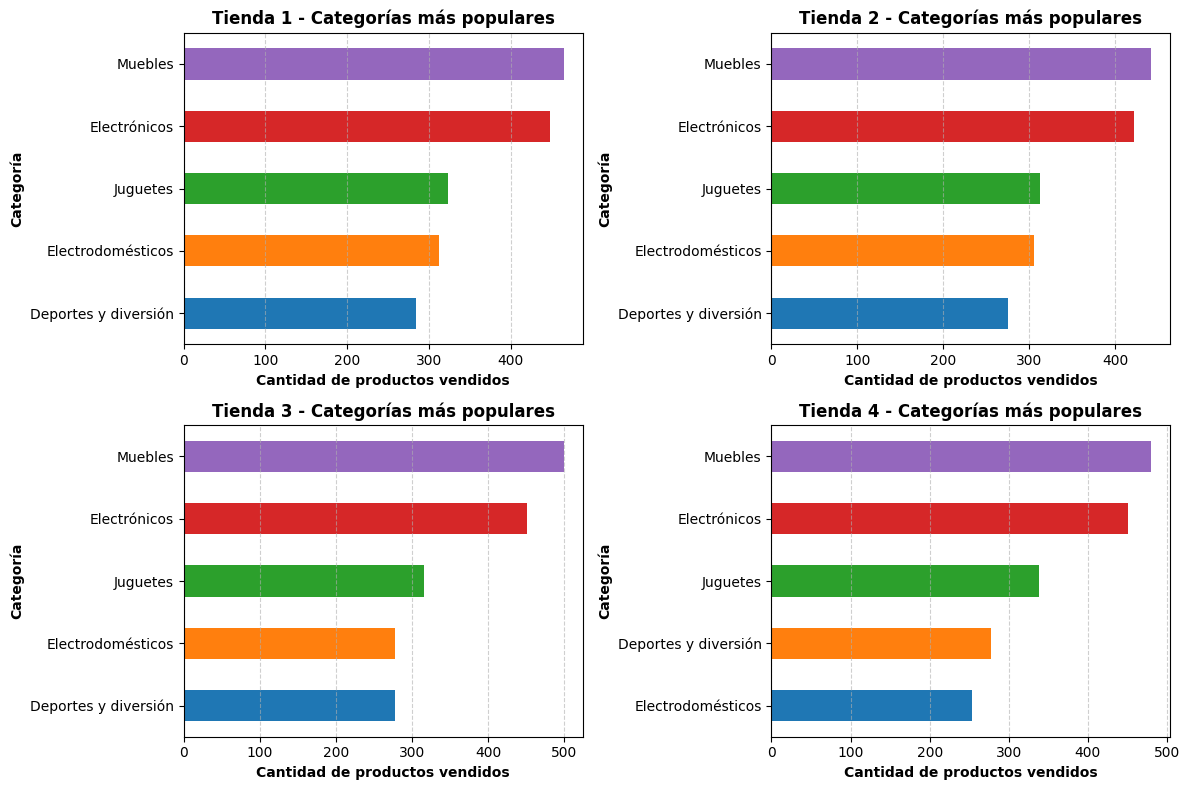

In [16]:
import matplotlib.pyplot as plt

#Gráficos de las categorías mas populares por cada tienda
resultados = [
    (cat_t1, "Tienda 1"),
    (cat_t2, "Tienda 2"),
    (cat_t3, "Tienda 3"),
    (cat_t4, "Tienda 4")
]

colores = plt.cm.tab10.colors

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

for ax, (categorias, nombre) in zip(axs, resultados):
    categorias_ordenadas = categorias.sort_values()
    categorias_ordenadas.plot(
        kind='barh',
        ax=ax,
        color=colores[:len(categorias_ordenadas)]
    )
    ax.set_title(f"{nombre} - Categorías más populares", fontsize=12, fontweight='bold')
    ax.set_xlabel("Cantidad de productos vendidos", fontweight='bold')
    ax.set_ylabel("Categoría", fontweight='bold')
    ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
# Calificación promedio por tienda
promedio_t1 = tienda['Calificación'].mean()
promedio_t2 = tienda2['Calificación'].mean()
promedio_t3 = tienda3['Calificación'].mean()
promedio_t4 = tienda4['Calificación'].mean()

print("Calificación promedio por tienda:")
print(f"Tienda 1: {promedio_t1:.2f}")
print(f"Tienda 2: {promedio_t2:.2f}")
print(f"Tienda 3: {promedio_t3:.2f}")
print(f"Tienda 4: {promedio_t4:.2f}")


Calificación promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


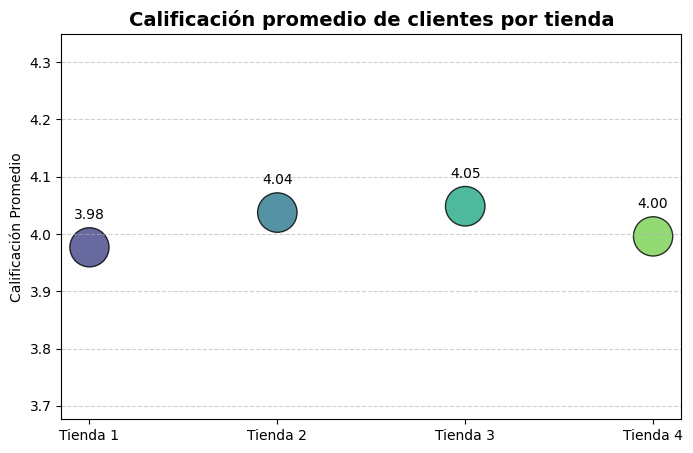

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de las tiendas mejor calificadas
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
promedios = [
    tienda['Calificación'].mean(),
    tienda2['Calificación'].mean(),
    tienda3['Calificación'].mean(),
    tienda4['Calificación'].mean()
]

plt.figure(figsize=(8, 5))
colores = plt.cm.viridis([0.2, 0.4, 0.6, 0.8])
tamaños = [p * 200 for p in promedios]

plt.scatter(nombres_tiendas, promedios, s=tamaños, c=colores, alpha=0.8, edgecolors="black")

for i, valor in enumerate(promedios):
    plt.text(nombres_tiendas[i], valor + 0.05, f"{valor:.2f}", ha='center', fontsize=10)

plt.title("Calificación promedio de clientes por tienda", fontsize=14, fontweight='bold')
plt.ylabel("Calificación Promedio")
plt.ylim(min(promedios) - 0.3, max(promedios) + 0.3)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda

# 6. Informe